In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Float value decimal places set for all float data type columns

In [2]:
pd.set_option('float_format', lambda x: '%0.2f' %x)

In [3]:
df = pd.read_csv(r"D:\Sales_Data_Analysis_Using_Python\sales_data_2022_2023.csv")
df

,Date,Product,Category,Region,Sales_Rep,Units_Sold,Unit_Price,Revenue,Cost,Profit
0,2023-10-11,Tablet,Electronics,South,Charlie,7,1613.43,11294.02,7397.93,3896.09
1,2023-08-16,Printer,Accessories,South,Alice,8,1237.45,9899.61,6403.12,3496.49
2,2022-03-25,Smartphone,Electronics,East,Alice,19,289.95,5509.09,4064.47,1444.62
3,2023-04-06,Laptop,Electronics,East,Diana,4,371.45,1485.79,1181.60,304.19
4,2022-03-22,Smartphone,Electronics,West,Alice,2,1471.80,2943.60,2594.97,348.62
...,...,...,...,...,...,...,...,...,...,...
995,2023-07-03,Laptop,Electronics,West,Alice,9,392.23,3530.10,3166.59,363.51
996,2023-01-11,Smartphone,Electronics,North,Diana,2,1987.18,3974.37,2438.17,1536.20
997,2023-12-18,Smartphone,Electronics,North,Bob,7,806.28,5643.93,4050.86,1593.07
998,2022-05-06,Tablet,Electronics,East,Diana,3,209.64,628.91,461.18,167.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1000 non-null   object 
 1   Product     1000 non-null   object 
 2   Category    1000 non-null   object 
 3   Region      1000 non-null   object 
 4   Sales_Rep   1000 non-null   object 
 5   Units_Sold  1000 non-null   int64  
 6   Unit_Price  1000 non-null   float64
 7   Revenue     1000 non-null   float64
 8   Cost        1000 non-null   float64
 9   Profit      1000 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.3+ KB


### Data type Change
  - Change Data type for `Date` Column from object to `Datetime`

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

### Add new column
 - Add new column `Year`, `Month` & `Quarter` from **Date** Column

In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quater'] = df['Date'].dt.quarter

In [7]:
df.head()

,Date,Product,Category,Region,Sales_Rep,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quater
0,2023-10-11,Tablet,Electronics,South,Charlie,7,1613.43,11294.02,7397.93,3896.09,2023,10,4
1,2023-08-16,Printer,Accessories,South,Alice,8,1237.45,9899.61,6403.12,3496.49,2023,8,3
2,2022-03-25,Smartphone,Electronics,East,Alice,19,289.95,5509.09,4064.47,1444.62,2022,3,1
3,2023-04-06,Laptop,Electronics,East,Diana,4,371.45,1485.79,1181.60,304.19,2023,4,2
4,2022-03-22,Smartphone,Electronics,West,Alice,2,1471.80,2943.60,2594.97,348.62,2022,3,1


In [8]:
df['Quater'] = df['Quater'].apply(lambda x: 'Q' + str(x))

In [9]:
df.describe(include='object')

,Product,Category,Region,Sales_Rep,Quater
count,1000,1000,1000,1000,1000
unique,5,2,4,4,4
top,Laptop,Electronics,East,Alice,Q1
freq,220,604,280,276,282


In [10]:
for column in df.select_dtypes(include='object').columns:
    print(column)
    print(df[column].unique())
    print('**********************************')

Product
['Tablet' 'Printer' 'Smartphone' 'Laptop' 'Monitor']
**********************************
Category
['Electronics' 'Accessories']
**********************************
Region
['South' 'East' 'West' 'North']
**********************************
Sales_Rep
['Charlie' 'Alice' 'Diana' 'Bob']
**********************************
Quater
['Q4' 'Q3' 'Q1' 'Q2']
**********************************


### Descriptive Analytics
  - Top products by revenue
  - Sales by region
  - `YoY` and `MoM` sales comparison
  - `Profit margins` and cost analysis

---
**Top products by revenue**

---

In [11]:
top_Product_by_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
top_Product_by_revenue

Product
Monitor      2402335.33
Smartphone   2126598.97
Laptop       2098295.81
Printer      2003044.42
Tablet       1836276.44
Name: Revenue, dtype: float64

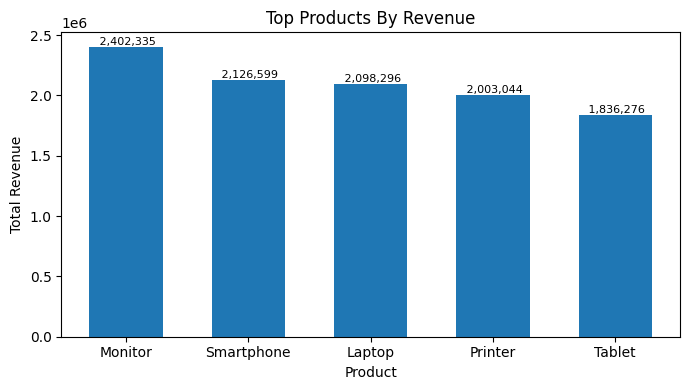

In [12]:
plt.figure(figsize=(7,4))
bars = plt.bar(top_Product_by_revenue.index,
        top_Product_by_revenue.values,
        width=0.6)
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Top Products By Revenue')
for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{bar.get_height(): ,.0f}', ha= 'center', va = 'bottom', fontsize = 8)
plt.tight_layout()
plt.show()

---
**Sales by region**

---

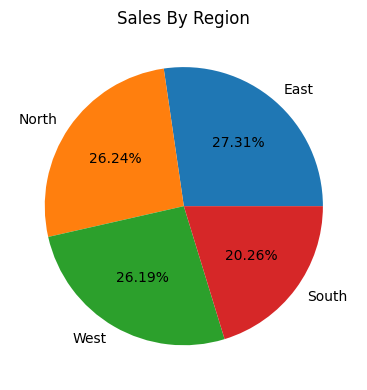

In [13]:
region_by_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize= (5,4))
plt.pie(region_by_revenue,
        labels= region_by_revenue.index,
        autopct = '%0.2f%%')
plt.title('Sales By Region')
plt.tight_layout()
plt.show()

In [14]:
df.head()

,Date,Product,Category,Region,Sales_Rep,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quater
0,2023-10-11,Tablet,Electronics,South,Charlie,7,1613.43,11294.02,7397.93,3896.09,2023,10,Q4
1,2023-08-16,Printer,Accessories,South,Alice,8,1237.45,9899.61,6403.12,3496.49,2023,8,Q3
2,2022-03-25,Smartphone,Electronics,East,Alice,19,289.95,5509.09,4064.47,1444.62,2022,3,Q1
3,2023-04-06,Laptop,Electronics,East,Diana,4,371.45,1485.79,1181.60,304.19,2023,4,Q2
4,2022-03-22,Smartphone,Electronics,West,Alice,2,1471.80,2943.60,2594.97,348.62,2022,3,Q1


#### Extra Analysis
 - Highest Category

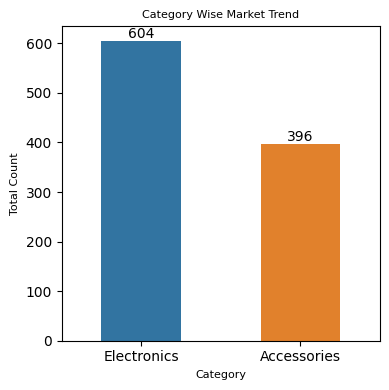

In [15]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data = df,
              x = df['Category'],
              order= df.groupby('Category')['Category'].count().sort_values(ascending=False).index,
              width = 0.5)
plt.xlabel('Category', fontsize = 8)
plt.ylabel('Total Count', fontsize = 8)
plt.title('Category Wise Market Trend', fontsize = 8)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

---

`YoY` and `MoM` sales comparison

---

In [16]:
df.head(10)

,Date,Product,Category,Region,Sales_Rep,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quater
0,2023-10-11,Tablet,Electronics,South,Charlie,7,1613.43,11294.02,7397.93,3896.09,2023,10,Q4
1,2023-08-16,Printer,Accessories,South,Alice,8,1237.45,9899.61,6403.12,3496.49,2023,8,Q3
2,2022-03-25,Smartphone,Electronics,East,Alice,19,289.95,5509.09,4064.47,1444.62,2022,3,Q1
3,2023-04-06,Laptop,Electronics,East,Diana,4,371.45,1485.79,1181.60,304.19,2023,4,Q2
4,2022-03-22,Smartphone,Electronics,West,Alice,2,1471.80,2943.60,2594.97,348.62,2022,3,Q1
5,2023-01-31,Smartphone,Electronics,East,Alice,2,445.47,890.93,583.58,307.35,2023,1,Q1
6,2023-06-06,Smartphone,Electronics,West,Alice,12,1262.14,15145.69,9119.52,6026.17,2023,6,Q2
7,2023-11-09,Tablet,Electronics,North,Alice,17,1097.07,18650.22,13427.38,5222.84,2023,11,Q4
8,2023-10-14,Laptop,Electronics,East,Diana,16,542.27,8676.25,5441.59,3234.66,2023,10,Q4
9,2022-01-27,Smartphone,Electronics,East,Alice,19,826.68,15706.88,14057.17,1649.70,2022,1,Q1


In [17]:
YOY_Sales = df.groupby('Year')['Revenue'].sum()
YOY_Sales

Year
2022   5033120.94
2023   5433430.03
Name: Revenue, dtype: float64

In [18]:
MOM_Sales = df.groupby('Month')['Revenue'].sum().sort_values(ascending = False)
MOM_Sales

Month
11   1145621.65
3    1047002.88
2    1003107.63
1     946342.22
6     939457.13
8     884441.38
12    878542.08
4     760347.13
9     755548.96
5     743334.66
7     725565.02
10    637240.23
Name: Revenue, dtype: float64

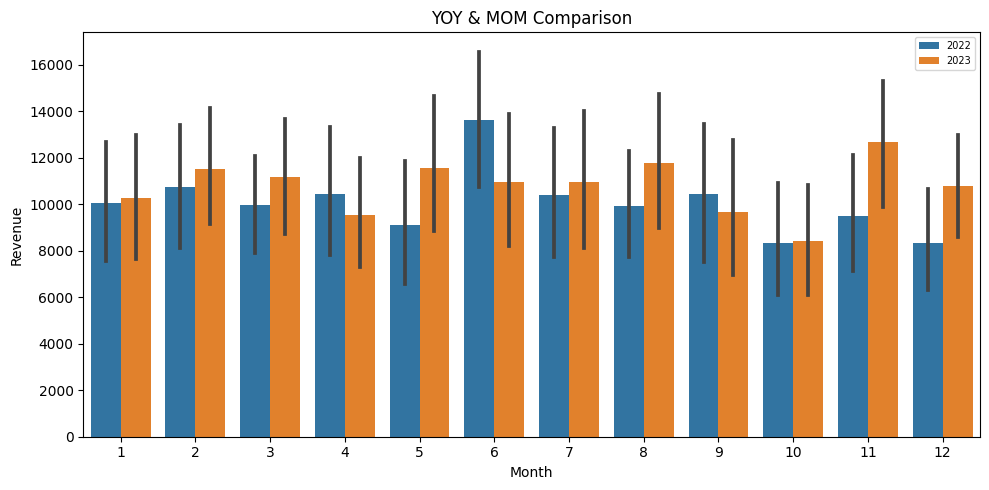

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data = df,
            x = 'Month',
            y = 'Revenue',
            hue = 'Year')
plt.title('YOY & MOM Comparison')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

In [20]:
df['Year'] = df['Year'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df_2023 = df[df['Year'] == 2023]
df_2023.groupby('Month')['Revenue'].sum()

Month
1    483453.94
2    530127.94
3    548231.06
4    342901.67
5    416187.78
6    394867.73
7    382963.51
8    458611.55
9    348745.55
10   294977.57
11   670838.09
12   561523.64
Name: Revenue, dtype: float64

In [21]:
df_2022 = df[df['Year'] == 2022]
df_2022.groupby('Month')['Revenue'].sum()

Month
1    462888.28
2    472979.69
3    498771.82
4    417445.46
5    327146.88
6    544589.40
7    342601.51
8    425829.83
9    406803.41
10   342262.66
11   474783.56
12   317018.44
Name: Revenue, dtype: float64

In [22]:
df.groupby(['Month', 'Year'])['Revenue'].sum()

Month  Year
1      2022   462888.28
       2023   483453.94
2      2022   472979.69
       2023   530127.94
3      2022   498771.82
       2023   548231.06
4      2022   417445.46
       2023   342901.67
5      2022   327146.88
       2023   416187.78
6      2022   544589.40
       2023   394867.73
7      2022   342601.51
       2023   382963.51
8      2022   425829.83
       2023   458611.55
9      2022   406803.41
       2023   348745.55
10     2022   342262.66
       2023   294977.57
11     2022   474783.56
       2023   670838.09
12     2022   317018.44
       2023   561523.64
Name: Revenue, dtype: float64

---

`Profit margins` and `cost analysis`

---

In [34]:
df.head(10)

,Date,Product,Category,Region,Sales_Rep,Units_Sold,Unit_Price,Revenue,Cost,Profit,Year,Month,Quater
0,2023-10-11,Tablet,Electronics,South,Charlie,7,1613.43,11294.02,7397.93,3896.09,2023,10,Q4
1,2023-08-16,Printer,Accessories,South,Alice,8,1237.45,9899.61,6403.12,3496.49,2023,8,Q3
2,2022-03-25,Smartphone,Electronics,East,Alice,19,289.95,5509.09,4064.47,1444.62,2022,3,Q1
3,2023-04-06,Laptop,Electronics,East,Diana,4,371.45,1485.79,1181.60,304.19,2023,4,Q2
4,2022-03-22,Smartphone,Electronics,West,Alice,2,1471.80,2943.60,2594.97,348.62,2022,3,Q1
5,2023-01-31,Smartphone,Electronics,East,Alice,2,445.47,890.93,583.58,307.35,2023,1,Q1
6,2023-06-06,Smartphone,Electronics,West,Alice,12,1262.14,15145.69,9119.52,6026.17,2023,6,Q2
7,2023-11-09,Tablet,Electronics,North,Alice,17,1097.07,18650.22,13427.38,5222.84,2023,11,Q4
8,2023-10-14,Laptop,Electronics,East,Diana,16,542.27,8676.25,5441.59,3234.66,2023,10,Q4
9,2022-01-27,Smartphone,Electronics,East,Alice,19,826.68,15706.88,14057.17,1649.70,2022,1,Q1


#### Quarterly Profit & Cost Trend


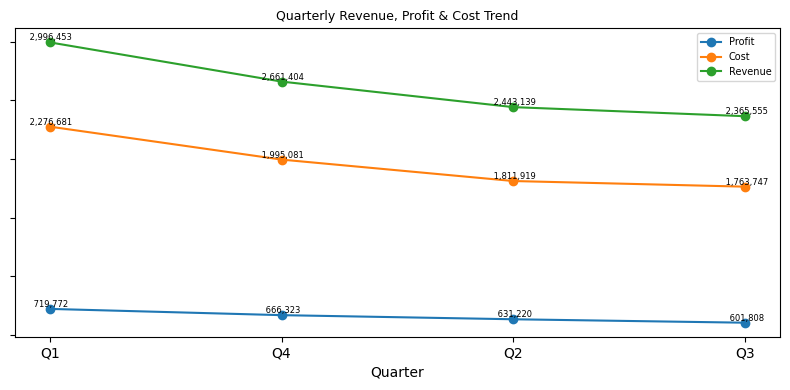

In [88]:
Quarter_Profit = df.groupby('Quater')['Profit'].sum().sort_values(ascending = False)
Quarter_Cost = df.groupby('Quater')['Cost'].sum().sort_values(ascending = False)
Quarter_Revenue = df.groupby('Quater')['Revenue'].sum().sort_values(ascending = False)
plt.figure(figsize = (8,4))
plt.plot(Quarter_Profit.index, Quarter_Profit.values, linestyle = '-', marker = 'o', label = 'Profit')
plt.plot(Quarter_Cost.index, Quarter_Cost.values, linestyle = '-', marker = 'o', label = 'Cost')
plt.plot(Quarter_Revenue.index, Quarter_Revenue.values, linestyle = '-', marker = 'o', label = 'Revenue')
plt.legend()
for x, y in zip(Quarter_Profit.index, Quarter_Profit.values):
        plt.text(x, y, f'{y: ,.0f}', ha= 'center', va = 'bottom', fontsize = 6)
for x, y in zip(Quarter_Cost.index, Quarter_Cost.values):
        plt.text(x, y, f'{y: ,.0f}', ha= 'center', va = 'bottom', fontsize = 6)
for x, y in zip(Quarter_Revenue.index, Quarter_Revenue.values):
        plt.text(x, y, f'{y: ,.0f}', ha= 'center', va = 'bottom', fontsize = 6)
plt.title('Quarterly Revenue, Profit & Cost Trend', fontsize = 9)
plt.xlabel('Quarter')
plt.legend(fontsize = 7)
plt.gca().set_yticklabels([])
plt.tight_layout()
plt.show()

In [71]:
df['Region'].unique()

array(['South', 'East', 'West', 'North'], dtype=object)

#### **Region wise `Cost`, `Revenue` & `Profit` Analysis**

In [89]:
CRP_BY_Region = df.groupby('Region')[['Cost', 'Revenue', 'Profit']].sum().sort_values(by = 'Profit', ascending = False)
CRP_BY_Region

,Cost,Revenue,Profit
Region,,,
North,2057789.39,2746717.31,688927.94
West,2051848.62,2740683.00,688834.28
East,2176329.73,2858223.66,681894.02
South,1561460.93,2120927.00,559466.06


#### Monthly Trend

In [103]:
CRP_BY_Month = df.groupby('Month')[['Cost', 'Revenue', 'Profit']].sum()
CRP_BY_Month

,Cost,Revenue,Profit
Month,,,
1,730603.18,946342.22,215739.08
2,757443.07,1003107.63,245664.55
3,788634.88,1047002.88,258368.00
4,564265.17,760347.13,196081.94
5,541965.23,743334.66,201369.45
6,705688.79,939457.13,233768.33
7,538697.46,725565.02,186867.56
8,670136.16,884441.38,214305.21
9,554913.31,755548.96,200635.64


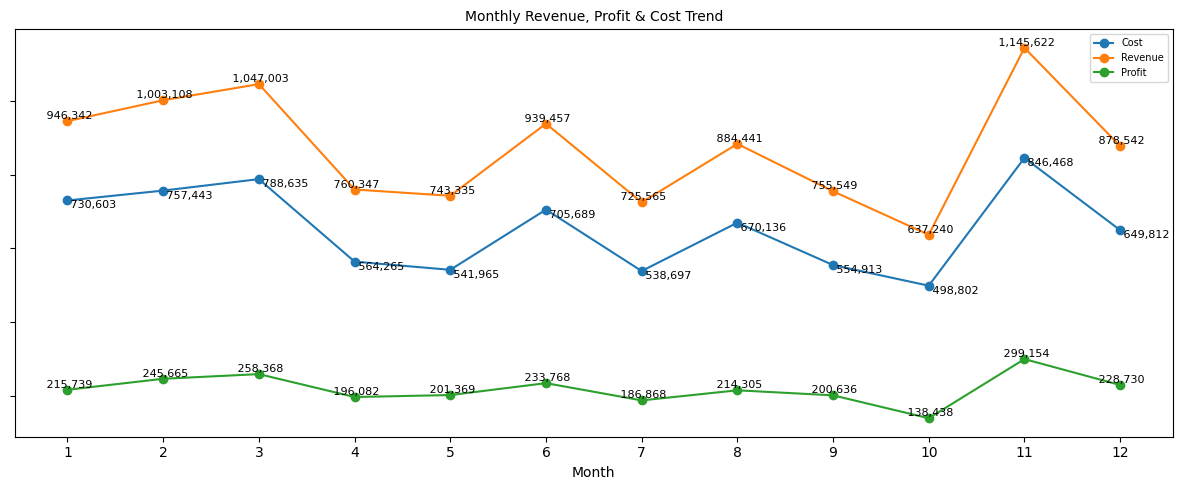

In [129]:
plt.figure(figsize = (12,5))
plt.plot(CRP_BY_Month.index, CRP_BY_Month['Cost'], linestyle = '-', marker = 'o', label = 'Cost')
plt.plot(CRP_BY_Month.index, CRP_BY_Month['Revenue'], linestyle = '-', marker = 'o', label = 'Revenue')
plt.plot(CRP_BY_Month.index, CRP_BY_Month['Profit'], linestyle = '-', marker = 'o', label = 'Profit')
plt.legend()
for x, y in zip(CRP_BY_Month.index, CRP_BY_Month['Cost']):
        plt.text(x, y, f'{y: ,.0f}', ha= 'left', va = 'top', fontsize = 8)
for x, y in zip(CRP_BY_Month.index, CRP_BY_Month['Revenue']):
        plt.text(x, y, f'{y: ,.0f}', ha= 'center', va = 'bottom', fontsize = 8)
for x, y in zip(CRP_BY_Month.index, CRP_BY_Month['Profit']):
        plt.text(x, y, f'{y: ,.0f}', ha= 'center', va = 'bottom', fontsize = 8)
plt.title('Monthly Revenue, Profit & Cost Trend', fontsize = 10)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.gca().set_yticklabels([])
plt.xlabel('Month')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

## Conclusion

- **Top Performing Product :**
   - The `Monitor` product emerged as the highest revenue-generating item, contributing a total revenue of **₹24,02,335**. This highlights its strong market demand and strategic importance in the product portfolio.

- **Regional Sales Performance :**
  - Revenue distribution across regions indicates significant disparities, with certain regions contributing a substantially higher share to total sales. This suggests the potential for focused regional marketing and distribution strategies.
  - With **28%** share, the `North region` is the top-performing market in terms of revenue.

- **Category Trends :**
  - Analysis of product categories shows clear preferences among consumers, with specific categories significantly outperforming others in terms of volume. This trend can guide inventory and product development planning.
  - *Top-Selling Category:* **Electronics**
  - *Performance Metric:* Highest units sold across all categories

- **YoY & MoM Sales Comparison :**

  - Year-over-year (YoY) analysis shows revenue growth patterns between 2022 and 2023.

  - Month-over-month (MoM) trends reveal seasonality, with peaks in certain months, which can inform marketing and promotional strategies.

- **Profitability & Cost Analysis :**

  - Quarterly Trends reveal that revenue, profit, and cost follow a synchronized trend across quarters, with **Q4** typically showing stronger financial outcomes.

  - Monthly trends further illustrate the cyclical nature of cost and profitability, offering insights for budget allocation and forecasting.

- **Region-wise Financial Analysis :**
  - The breakdown of Cost, Revenue, and Profit by Region highlights operational efficiency and market saturation levels, aiding in optimizing regional operations and investments.
  - Among all regions, **North** and **West** stand out as the most profitable markets.

##  Recommendations:

 - Prioritize high-performing products like `Monitor` for promotions and bundling.

 - Focus on high-revenue regions for strategic expansion.

 - Optimize underperforming months using targeted campaigns.

 - Monitor cost margins closely to maintain profitability.
